In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load dữ liệu

In [2]:
df = pd.read_csv('SuperStoreOrders.csv')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

### 2. Làm sạch dữ liệu

In [5]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


In [6]:
# Chuẩn hóa kiểu dữ liệu ngày tháng
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True, errors='coerce')
df["ship_date"] = pd.to_datetime(df["ship_date"], dayfirst=True, errors='coerce')

In [7]:
print(df['sales'].dtype)

object


In [8]:
df['sales'] = df['sales'].astype(str).str.replace(',', '', regex=False)
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [9]:
# Tạo thêm cột 'shipping_duration' (số ngày giao hàng)
df['shipping_duration'] = (df['ship_date'] - df['order_date']).dt.days

# Kiểm tra các giá trị âm hoặc bất thường trong shipping_duration
print(df['shipping_duration'].describe())

# Nếu có giá trị bất thường, xử lý (ví dụ loại bỏ hoặc sửa)
df = df[df['shipping_duration'] >= 0]

count    13297.000000
mean         3.575393
std          1.749692
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: shipping_duration, dtype: float64


### 3. Thống kê mô tả cơ bản

In [10]:
print("Tổng doanh số:", df['sales'].sum())
print("Tổng lợi nhuận:", df['profit'].sum())
print("Doanh số trung bình:", df['sales'].mean())
print("Lợi nhuận trung bình:", df['profit'].mean())

Tổng doanh số: 3245074
Tổng lợi nhuận: 400896.38758
Doanh số trung bình: 244.04557418966684
Lợi nhuận trung bình: 30.149386145747158


### 4. Phân tích tổng quan doanh số và lợi nhuận theo thời gian

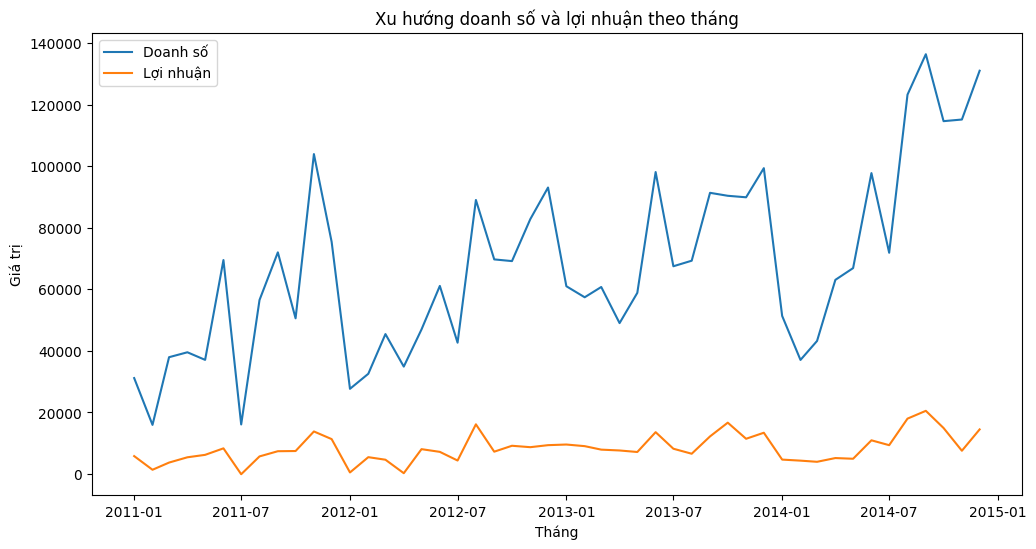

In [11]:
# Tạo cột tháng
df['month'] = df['order_date'].dt.to_period('M')

# Doanh số, lợi nhuận theo tháng
monthly = df.groupby('month').agg({'sales':'sum', 'profit':'sum'}).reset_index()
monthly['month'] = monthly['month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly['month'], monthly['sales'], label='Doanh số')
plt.plot(monthly['month'], monthly['profit'], label='Lợi nhuận')
plt.title("Xu hướng doanh số và lợi nhuận theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Giá trị")
plt.legend()
plt.show()

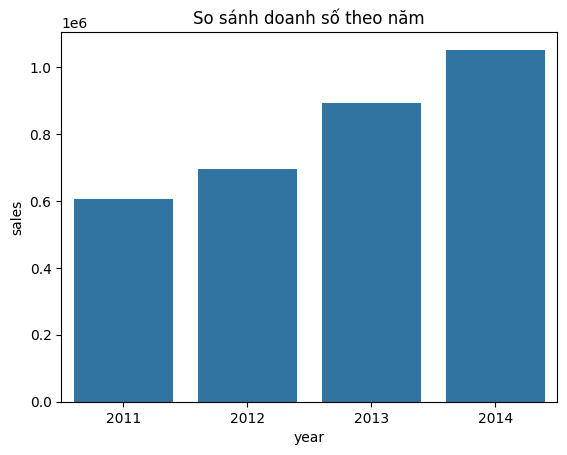

In [12]:
# So sánh doanh số theo năm
yearly = df.groupby('year').agg({'sales':'sum', 'profit':'sum'}).reset_index()
sns.barplot(data=yearly, x='year', y='sales')
plt.title("So sánh doanh số theo năm")
plt.show()

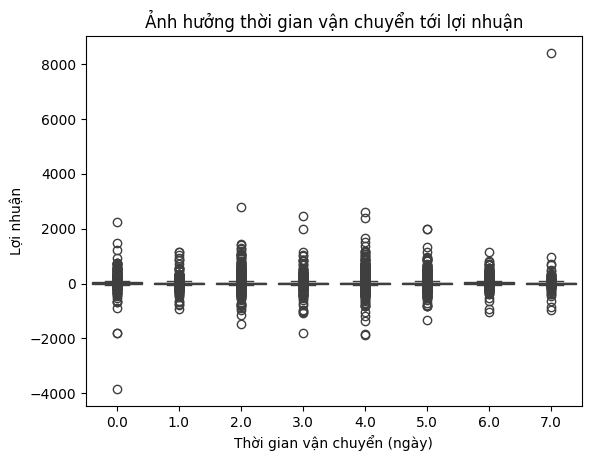

In [13]:
sns.boxplot(data=df, x='shipping_duration', y='profit')
plt.title("Ảnh hưởng thời gian vận chuyển tới lợi nhuận")
plt.xlabel("Thời gian vận chuyển (ngày)")
plt.ylabel("Lợi nhuận")
plt.show()

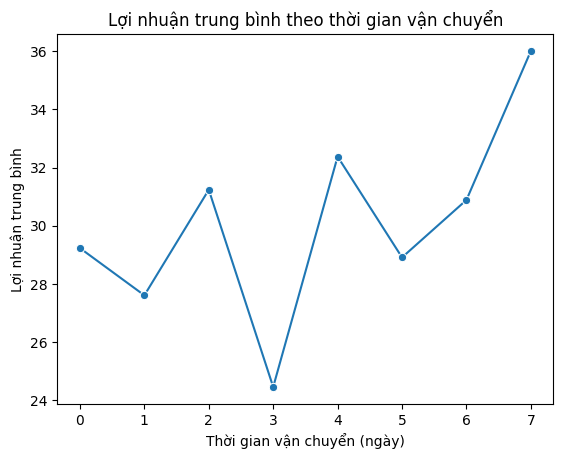

In [ ]:
avg_profit = df.groupby('shipping_duration')['profit'].mean().reset_index()

sns.lineplot(data=avg_profit, x='shipping_duration', y='profit', marker='o')
plt.title("Lợi nhuận trung bình theo thời gian vận chuyển")
plt.xlabel("Thời gian vận chuyển (ngày)")
plt.ylabel("Lợi nhuận trung bình")
plt.show()

### 5. Phân tích hành vi khách hàng và phân khúc thị trường

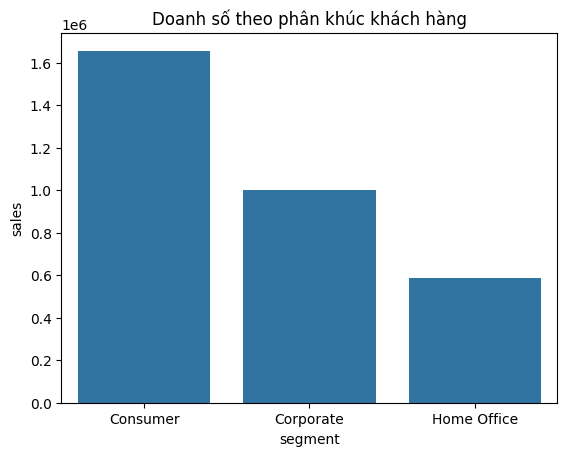

In [15]:
# Doanh số, lợi nhuận theo phân khúc khách hàng
seg = df.groupby('segment').agg({'sales':'sum', 'profit':'sum'}).reset_index()
sns.barplot(data=seg, x='segment', y='sales')
plt.title("Doanh số theo phân khúc khách hàng")
plt.show()

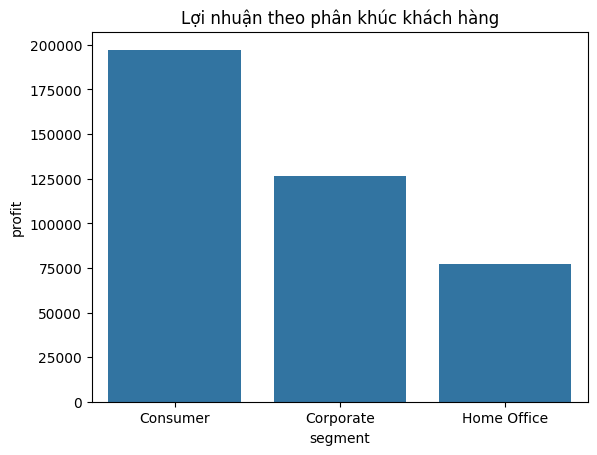

In [16]:
sns.barplot(data=seg, x='segment', y='profit')
plt.title("Lợi nhuận theo phân khúc khách hàng")
plt.show()

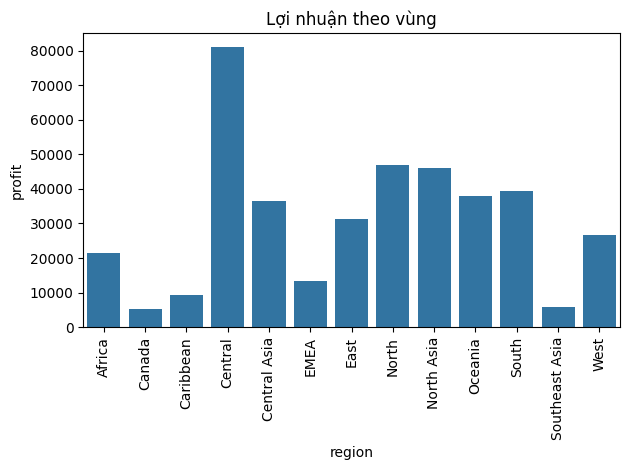

In [17]:
# So sánh hiệu quả theo vùng
region = df.groupby('region').agg({'sales':'sum', 'profit':'sum'}).reset_index()
sns.barplot(data=region, x='region', y='profit')
plt.title("Lợi nhuận theo vùng")
plt.xticks(rotation=90)
plt.tight_layout() # Tự động điều chỉnh bố cục để tránh bị cắt
plt.show()

In [18]:
# Tìm phân khúc khách hàng lợi nhuận cao nhất
best_segment = seg.sort_values(by='profit', ascending=False).iloc[0]
print(f"Phân khúc lợi nhuận cao nhất: {best_segment['segment']} với lợi nhuận {best_segment['profit']}")

Phân khúc lợi nhuận cao nhất: Consumer với lợi nhuận 197283.59114


### 6. Phân tích kênh vận chuyển và chi phí shipping

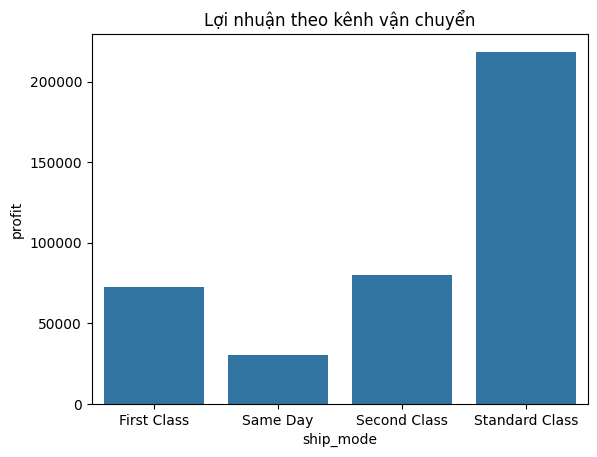

In [19]:
ship = df.groupby('ship_mode').agg({'profit':'sum', 'shipping_cost':'sum'}).reset_index()
sns.barplot(data=ship, x='ship_mode', y='profit')
plt.title("Lợi nhuận theo kênh vận chuyển")
plt.show()

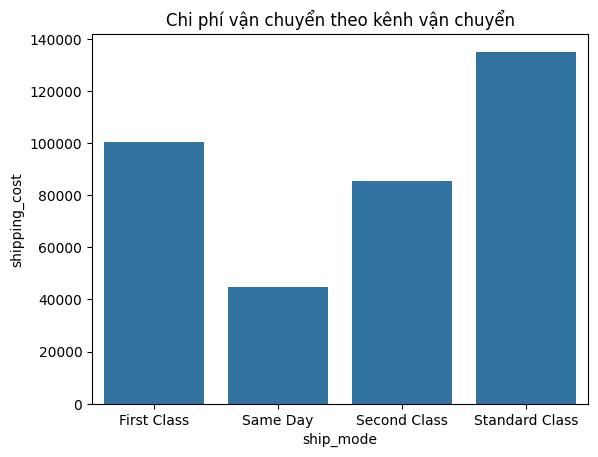

In [20]:
sns.barplot(data=ship, x='ship_mode', y='shipping_cost')
plt.title("Chi phí vận chuyển theo kênh vận chuyển")
plt.show()

In [21]:
# Tối ưu chi phí so với lợi nhuận: tỉ lệ profit trên shipping_cost
ship['profit_to_shipping_ratio'] = ship['profit'] / ship['shipping_cost']
print(ship.sort_values(by='profit_to_shipping_ratio', ascending=False))

        ship_mode        profit  shipping_cost  profit_to_shipping_ratio
3  Standard Class  218615.88990      135182.62                  1.617189
2    Second Class   79678.97820       85316.91                  0.933918
0     First Class   72332.56082      100310.35                  0.721088
1        Same Day   30268.95866       44586.32                  0.678884


### 7. Phân tích sản phẩm

In [22]:
# Top sản phẩm bán chạy
top_products = df.groupby('product_name').agg({'sales':'sum', 'profit':'sum'}).reset_index()
top_products = top_products.sort_values(by='sales', ascending=False).head(10)
print("Top 10 sản phẩm bán chạy:")
print(top_products)

Top 10 sản phẩm bán chạy:
                                           product_name  sales     profit
2584                      Samsung Smart Phone, Cordless  17609 -1733.8200
752               Canon imageCLASS 2200 Advanced Copier  17500  8399.9760
841                   Cisco Smart Phone, with Caller ID  17023  4167.1848
2278  Office Star Executive Leather Armchair, Adjust...  14938   738.4880
1045                      Eldon File Cart, Single Width  14288  2178.9240
2161                  Nokia Smart Phone, with Caller ID  13972  3799.0220
1592              Hon Executive Leather Armchair, Black  13176   727.7224
2586                          Samsung Smart Phone, VoIP  13021   328.5920
270                        Apple Smart Phone, Full Size  12635   753.6690
1459                       Hamilton Beach Stove, Silver  12509  1618.2930


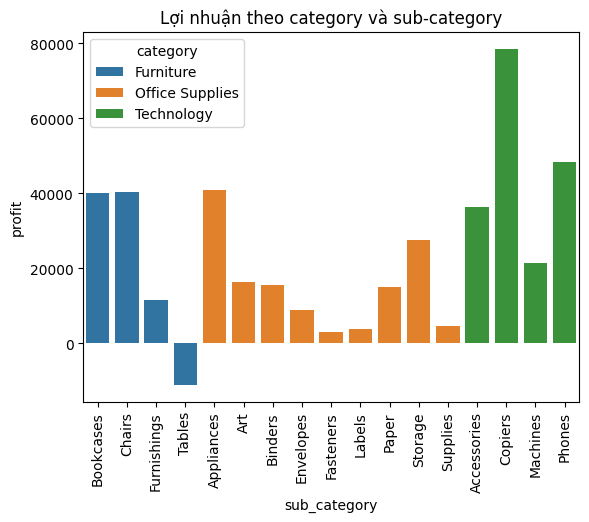

In [23]:
# Phân tích theo category và sub-category
cat = df.groupby(['category','sub_category']).agg({'sales':'sum', 'profit':'sum'}).reset_index()
sns.barplot(data=cat, x='sub_category', y='profit', hue='category')
plt.title("Lợi nhuận theo category và sub-category")
plt.xticks(rotation=90)
plt.show()

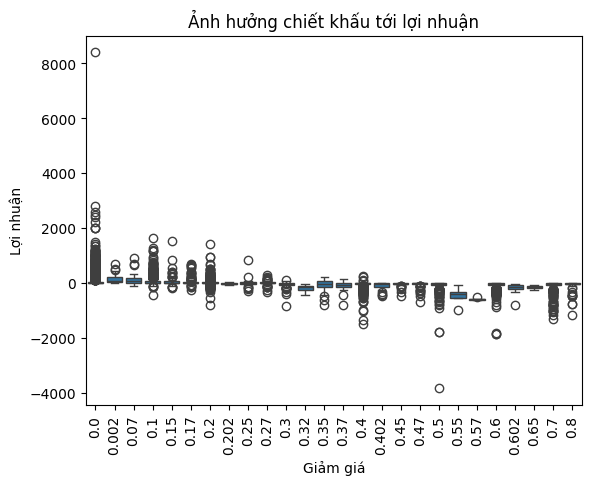

In [24]:
sns.boxplot(data=df, x='discount', y='profit')
plt.title("Ảnh hưởng chiết khấu tới lợi nhuận")
plt.xlabel("Giảm giá")
plt.ylabel("Lợi nhuận")
plt.xticks(rotation=90)
plt.show()

### 8. Dự đoán đơn hàng quan trọng

In [25]:
# Phân tích đặc điểm đơn hàng ưu tiên cao
priority_orders = df[df['order_priority'].isin(['Critical', 'High'])]
print(priority_orders.describe())

# Ví dụ xây mô hình phân loại đơn hàng ưu tiên cao
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Chuẩn bị dữ liệu
df['priority_flag'] = df['order_priority'].apply(lambda x: 1 if x in ['Critical', 'High'] else 0)

features = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'shipping_duration']
X = df[features]
y = df['priority_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy trên tập test:", model.score(X_test, y_test))

                          order_date                      ship_date  \
count                           5815                           5815   
mean   2013-04-24 07:39:06.964746496  2013-04-26 22:14:45.296646656   
min              2011-01-01 00:00:00            2011-01-03 00:00:00   
25%              2012-06-01 12:00:00            2012-06-04 00:00:00   
50%              2013-06-10 00:00:00            2013-06-11 00:00:00   
75%              2014-05-07 00:00:00            2014-05-10 12:00:00   
max              2014-12-12 00:00:00            2014-12-12 00:00:00   
std                              NaN                            NaN   

             sales     quantity     discount       profit  shipping_cost  \
count  5815.000000  5815.000000  5815.000000  5815.000000    5815.000000   
mean    241.392089     3.404127     0.142580    29.676643      38.235395   
min       1.000000     1.000000     0.000000 -3839.990400       0.010000   
25%      30.000000     2.000000     0.000000     0.00000

### Kết luận từ dữ liệu:

1. **Xu hướng doanh số và lợi nhuận theo thời gian (2011-2015):**
   - Doanh số (doanh thu) tăng dần qua các năm, đặc biệt tăng mạnh từ 2013-2014, đạt đỉnh khoảng 1.2 triệu đơn vị vào năm 2014.
   - Lợi nhuận có xu hướng tăng chậm hơn và không đồng đều với doanh số, cho thấy biên lợi nhuận có thể bị ảnh hưởng bởi chi phí.

2. **Doanh số và lợi nhuận theo phân khúc khách hàng:**
   - Phân khúc **Consumer** dẫn đầu về cả doanh số (khoảng 1.6 triệu) và lợi nhuận (hơn 197,000), vượt trội so với **Corporate** và **Home Office**.
   - Phân khúc **Home Office** có doanh số và lợi nhuận thấp nhất.

3. **Ảnh hưởng của thời gian vận chuyển:**
   - Lợi nhuận trung bình giảm khi thời gian vận chuyển tăng từ 0 đến 3 ngày, nhưng tăng trở lại từ 4 ngày trở lên, đạt đỉnh ở khoảng 7 ngày (~36,000).
   - Chi phí vận chuyển cao nhất ở **Standard Class**, nhưng lợi nhuận cũng cao nhất ở phân khúc này (tỷ lệ lợi nhuận/chi phí ~1.62).

4. **Lợi nhuận theo vùng:**
   - Vùng **Central Asia** có lợi nhuận cao nhất (~80,000), trong khi các vùng như **Caribbean** và **West Africa** có lợi nhuận rất thấp.

5. **Lợi nhuận theo danh mục sản phẩm:**
   - Danh mục **Technology** (đặc biệt là **Phones** và **Copiers**) mang lại lợi nhuận cao nhất, trong khi **Furniture** (như **Tables**) và một số sản phẩm **Office Supplies** (như **Envelopes**) có lợi nhuận thấp hoặc âm.

6. **Ảnh hưởng của chiết khấu:**
   - Chiết khấu cao (trên 0.2) thường dẫn đến lợi nhuận giảm, đặc biệt khi vượt quá 0.4, cho thấy chiết khấu lớn có thể làm giảm biên lợi nhuận.

7. **Hiệu quả kênh vận chuyển:**
   - **Standard Class** mang lại lợi nhuận cao nhất (218,616) với tỷ lệ lợi nhuận/chi phí tốt nhất, trong khi **Same Day** có lợi nhuận thấp nhất (30,269) dù chi phí thấp hơn.

8. **Đơn hàng ưu tiên cao:**
   - Đơn hàng ưu tiên cao (**Critical**, **High**) chiếm một phần đáng kể, với doanh số trung bình ~241 và lợi nhuận trung bình ~29.7, cho thấy cần tập trung tối ưu hóa các đơn này.
   - Mô hình phân loại đạt độ chính xác 80%, cho thấy có thể dự đoán hiệu quả đơn hàng ưu tiên dựa trên các yếu tố như doanh số, chi phí vận chuyển, và chiết khấu.

### Đề xuất giải pháp và hành động cụ thể:

1. **Tập trung vào phân khúc khách hàng tiềm năng:**
   - **Ưu tiên phân khúc Consumer**: Đẩy mạnh chiến dịch marketing và sản phẩm dành cho khách hàng cá nhân, đặc biệt trong các danh mục **Technology**.
   - **Cải thiện Home Office**: Nghiên cứu nguyên nhân doanh số thấp, có thể điều chỉnh sản phẩm hoặc giá cả để thu hút phân khúc này.

2. **Tối ưu hóa thời gian vận chuyển:**
   - Giảm thời gian vận chuyển xuống khoảng 4-7 ngày để tối đa hóa lợi nhuận, thay vì tập trung vào giao hàng nhanh (Same Day) có hiệu quả thấp.
   - Đánh giá lại chi phí và dịch vụ của **Standard Class** để duy trì lợi thế cạnh tranh.

3. **Quản lý danh mục sản phẩm:**
   - Tăng cường đầu tư vào sản phẩm **Technology** (Phones, Copiers) vì lợi nhuận cao.
   - Giảm hoặc loại bỏ các sản phẩm có lợi nhuận âm (như một số sản phẩm trong **Furniture** và **Office Supplies**) hoặc cải thiện giá bán/chi phí sản xuất.

4. **Điều chỉnh chính sách chiết khấu:**
   - Hạn chế chiết khấu trên 0.2, đặc biệt với các sản phẩm có biên lợi nhuận thấp, để bảo toàn lợi nhuận.
   - Áp dụng chiết khấu có chọn lọc cho các khách hàng lớn hoặc đơn hàng lớn.

5. **Tối ưu hóa kênh vận chuyển:**
   - Đẩy mạnh sử dụng **Standard Class** vì hiệu quả cao nhất về lợi nhuận/chi phí.
   - Giảm tần suất sử dụng **Same Day** trừ khi có nhu cầu đặc biệt, do tỷ lệ lợi nhuận/chi phí thấp (~0.68).

6. **Phát triển vùng thị trường:**
   - Mở rộng thị trường tại **Central Asia** và các vùng có lợi nhuận cao (North Asia, Oceania).
   - Đánh giá lại chiến lược tại **Caribbean** và **West Africa** để cải thiện hiệu quả kinh doanh.

7. **Tối ưu hóa đơn hàng ưu tiên cao:**
   - Sử dụng mô hình phân loại để dự đoán và ưu tiên nguồn lực cho các đơn hàng **Critical** và **High**, tập trung vào các yếu tố như doanh số cao và chi phí vận chuyển thấp.
   - Đào tạo đội ngũ để xử lý nhanh chóng các đơn hàng ưu tiên, tăng sự hài lòng khách hàng.

8. **Theo dõi và cải tiến liên tục:**
   - Thường xuyên phân tích dữ liệu hàng tháng để điều chỉnh chiến lược dựa trên xu hướng mới.
   - Áp dụng các công cụ dự đoán nâng cao để tối ưu hóa lợi nhuận dựa trên mô hình hiện tại (độ chính xác 80%).